In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cStick.csv")

In [3]:
df.head()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1,101.396,61.080,87.770,1,1
1,2.595,2,110.190,20.207,65.190,1,2
2,68.067,0,87.412,79.345,99.345,0,0
3,13.090,1,92.266,36.180,81.545,1,1
4,69.430,0,89.480,80.000,99.990,0,0


In [4]:
df.describe()

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,28.694527,0.988720,95.657002,72.909243,83.563649,0.661599,0.988720
std,23.773644,0.815918,17.576499,46.940110,11.111592,0.473282,0.815918
min,0.000000,0.000000,60.000000,10.000000,60.000000,0.000000,0.000000
25%,7.642500,0.000000,82.418000,40.230000,75.285000,0.000000,0.000000
50%,20.560000,1.000000,97.238000,69.960000,85.280000,1.000000,1.000000
75%,55.205500,2.000000,109.695000,77.612500,92.692500,1.000000,2.000000
max,69.981000,2.000000,124.980000,179.293000,99.990000,1.000000,2.000000


In [5]:
df.dtypes

Distance         float64
Pressure           int64
HRV              float64
Sugar level      float64
SpO2             float64
Accelerometer      int64
Decision           int64
dtype: object

In [6]:
df.shape

(2039, 7)

In [7]:
df['Decision'].value_counts()

Decision
0    690
1    682
2    667
Name: count, dtype: int64

In [8]:
y = pd.Series(df['Decision'])
fields = list(df.columns[:-1])  # everything except "color"
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Distance        -0.946120
SpO2            -0.923111
Sugar level      0.156680
Accelerometer    0.866866
HRV              0.925209
Pressure         1.000000
dtype: float64

In [9]:
df = df.drop(["Distance","Pressure","Sugar level"],axis = 1)

In [10]:
df.head(10)

,HRV,SpO2,Accelerometer,Decision
0,101.396,87.770,1,1
1,110.190,65.190,1,2
2,87.412,99.345,0,0
3,92.266,81.545,1,1
4,89.480,99.990,0,0
5,102.584,88.580,1,1
6,70.824,93.690,0,0
7,84.816,98.460,0,0
8,75.752,95.370,0,0
9,99.658,86.585,1,1


In [11]:
from sklearn.preprocessing import StandardScaler
fields = ['HRV','SpO2','Accelerometer']
x_df = df.loc[:,fields]
print(x_df)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)
x_scaled = pd.DataFrame(x_scaled, columns=['%s_scaled' % fld for fld in fields])
print(x_scaled)

          HRV    SpO2  Accelerometer
0     101.396  87.770              1
1     110.190  65.190              1
2      87.412  99.345              0
3      92.266  81.545              1
4      89.480  99.990              0
...       ...     ...            ...
2034  116.310  71.310              1
2035  124.320  79.320              1
2036   93.828  82.610              1
2037  123.240  78.240              1
2038   78.876  96.435              0

[2039 rows x 3 columns]
      HRV_scaled  SpO2_scaled  Accelerometer_scaled
0       0.326595     0.378648              0.715185
1       0.827045    -1.653962              0.715185
2      -0.469207     1.420609             -1.398239
3      -0.192976    -0.181715              0.715185
4      -0.351522     1.478670             -1.398239
...          ...          ...                   ...
2034    1.175323    -1.103051              0.715185
2035    1.631157    -0.382006              0.715185
2036   -0.104085    -0.085846              0.715185
2037    1.5

In [12]:
x_scaled.describe()

,HRV_scaled,SpO2_scaled,Accelerometer_scaled
count,2.039000e+03,2.039000e+03,2.039000e+03
mean,1.707533e-16,-2.639706e-16,-5.314260e-17
std,1.000245e+00,1.000245e+00,1.000245e+00
min,-2.029173e+00,-2.121157e+00,-1.398239e+00
25%,-7.534066e-01,-7.452289e-01,-1.398239e+00
50%,8.997158e-02,1.545028e-01,7.151853e-01
75%,7.988759e-01,8.217626e-01,7.151853e-01
max,1.668716e+00,1.478670e+00,7.151853e-01


In [13]:
x_scaled = np.array(x_scaled)
y= np.array(y)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(x_scaled, y):
    x_train, x_test = x_scaled[train_idx], x_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [15]:
x_train.shape

(1631, 3)

In [16]:
x_test.shape

(408, 3)

In [17]:
pd.DataFrame(y_train).value_counts(normalize=True)

0
0    0.338443
1    0.334151
2    0.327406
Name: proportion, dtype: float64

In [18]:
pd.DataFrame(y_test).value_counts(normalize=True)

0
0    0.338235
1    0.335784
2    0.325980
Name: proportion, dtype: float64

In [66]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

dtree = DecisionTreeClassifier(criterion="entropy",      # use entropy to force information gain
                            max_depth=10,              # allow more depth
                            class_weight={0: 1, 1: 2, 2: 5},   # force tree to use subsets of features at each split
                            random_state=42)           # You can limit depth to make output smaller
dtree.fit(x_train, y_train)
print(dtree.feature_importances_)

[0.         0.73211563 0.26788437]


In [67]:
print(export_text(dtree, feature_names=["hrv", "spo2", "acc"],decimals=6))

|--- spo2 <= -0.323044
|   |--- class: 2
|--- spo2 >  -0.323044
|   |--- acc <= -0.341527
|   |   |--- class: 0
|   |--- acc >  -0.341527
|   |   |--- class: 1



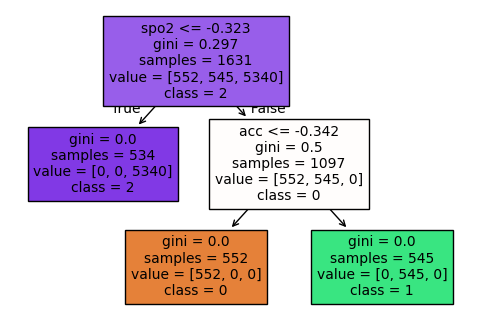

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plot_tree(clf, feature_names=["hrv", "spo2", "acc"], class_names=["0", "1", "2"], filled=True)
plt.show()

In [26]:
print(clf.feature_importances_)

[0.         0.71337442 0.28662558]


In [64]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion="gini",max_depth= 100,class_weight={0: 1, 1: 1, 2:10},n_estimators=20,random_state=42)
rf.fit(x_train, y_train)

print(rf.feature_importances_)

[0.30491674 0.44335663 0.25172663]


In [59]:
unique_tree_structures = set()
unique_trees = []

for tree in rf.estimators_:
    structure = tree.tree_.__getstate__()  # Capture structure
    structure_hash = hash(str(structure))  # You can also use hashlib

    if structure_hash not in unique_tree_structures:
        unique_tree_structures.add(structure_hash)
        unique_trees.append(tree)

# Now `unique_trees` contains only unique ones
print(f"Original trees: {len(rf.estimators_)}, Unique: {len(unique_trees)}")

Original trees: 20, Unique: 20


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[138   0   0]
 [  0 137   0]
 [  0   0 133]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       133

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [61]:
new_input = np.array([[0,0,0]])  # Example values (raw sensor readings)

# Apply the same scaling
new_input_scaled = scaler.transform(new_input)

# Make prediction
predicted_class = clf.predict(new_input_scaled)

print("Predicted Class:", predicted_class[0])

Predicted Class: 2


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [62]:
for i, rf in enumerate(rf.estimators_):
    print(f"Tree {i}: predicts {rf.predict([x_test[101]])}")


Tree 0: predicts [2.]
Tree 1: predicts [2.]
Tree 2: predicts [2.]
Tree 3: predicts [2.]
Tree 4: predicts [2.]
Tree 5: predicts [2.]
Tree 6: predicts [2.]
Tree 7: predicts [2.]
Tree 8: predicts [2.]
Tree 9: predicts [2.]
Tree 10: predicts [2.]
Tree 11: predicts [2.]
Tree 12: predicts [2.]
Tree 13: predicts [2.]
Tree 14: predicts [2.]
Tree 15: predicts [2.]
Tree 16: predicts [2.]
Tree 17: predicts [2.]
Tree 18: predicts [2.]
Tree 19: predicts [2.]


In [65]:
from sklearn.tree import export_text
for i in range(0,20):
    tree_rules = export_text(rf.estimators_[i], feature_names=["hrv", "spo2", "acc"],decimals=6)
    print(tree_rules)

|--- hrv <= 0.532887
|   |--- spo2 <= 0.579614
|   |   |--- class: 1.0
|   |--- spo2 >  0.579614
|   |   |--- class: 0.0
|--- hrv >  0.532887
|   |--- class: 2.0

|--- acc <= -0.341527
|   |--- class: 0.0
|--- acc >  -0.341527
|   |--- hrv <= 0.529928
|   |   |--- class: 1.0
|   |--- hrv >  0.529928
|   |   |--- class: 2.0

|--- spo2 <= -0.323044
|   |--- class: 2.0
|--- spo2 >  -0.323044
|   |--- spo2 <= 0.578939
|   |   |--- class: 1.0
|   |--- spo2 >  0.578939
|   |   |--- class: 0.0

|--- acc <= -0.341527
|   |--- class: 0.0
|--- acc >  -0.341527
|   |--- spo2 <= -0.323719
|   |   |--- class: 2.0
|   |--- spo2 >  -0.323719
|   |   |--- class: 1.0

|--- acc <= -0.341527
|   |--- class: 0.0
|--- acc >  -0.341527
|   |--- spo2 <= -0.323044
|   |   |--- class: 2.0
|   |--- spo2 >  -0.323044
|   |   |--- class: 1.0

|--- spo2 <= -0.322369
|   |--- class: 2.0
|--- spo2 >  -0.322369
|   |--- spo2 <= 0.580964
|   |   |--- class: 1.0
|   |--- spo2 >  0.580964
|   |   |--- class: 0.0

|--- s

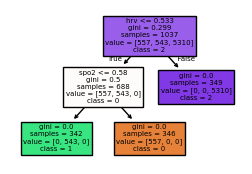

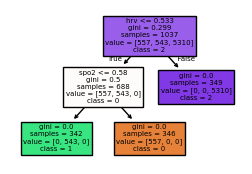

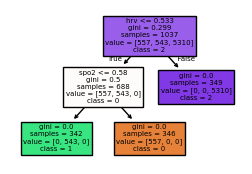

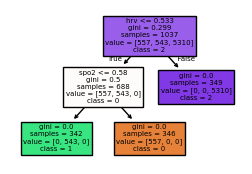

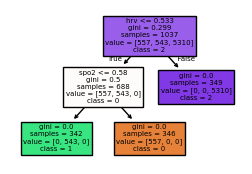

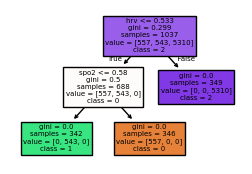

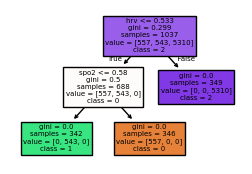

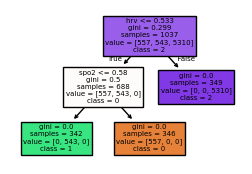

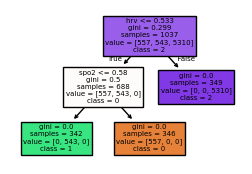

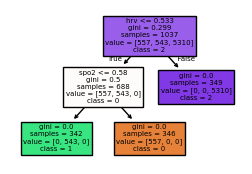

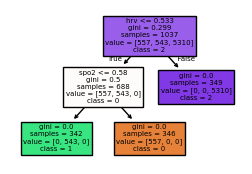

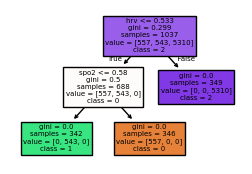

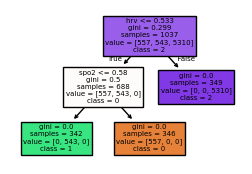

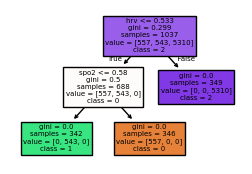

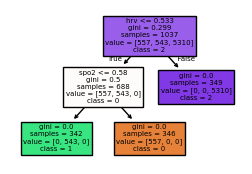

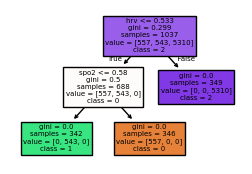

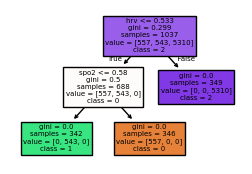

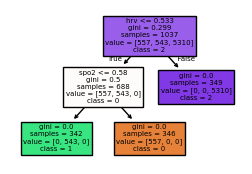

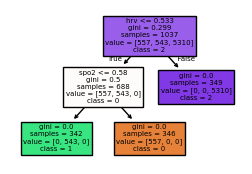

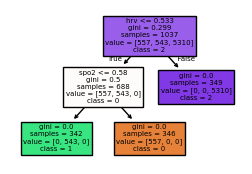

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
for i in range(0,20):
    plt.figure(figsize=(3,2))
    plot_tree(rf.estimators_[0], feature_names=["hrv", "spo2", "temp"], class_names=["0", "1", "2"], filled=True)
    plt.show()